# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


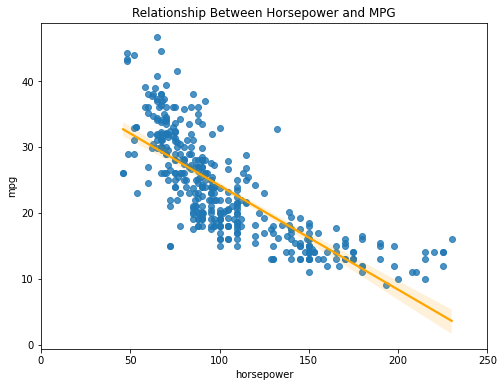

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
# call_on_students(1)

#### Answer: 

- Plot showing the RSS vs the slope of mpg vs horsepower
- Plot shows the error (RSS) on the y-axis and the slope of the model on the x-axis
- From this graph you can see that it arrived at about m = -0.158 for the optimal coefficient value, since it's around that point that the error term (RSS) is smallest



### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [7]:
# call_on_students(1)

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
# call_on_students(1)

#### Answer: 

- Step size captures the amount to change the coefficient as it tries to minimize the error term
- Learning rate determines how large those steps are to start


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
# call_on_students(1)

#### Answer: 

- What kind of target is a logistic regression model used for?
- Used for classification problems (categorical targets)
--------------------------------------------------------------------
- What are the predictions that a logistic regression model outputs?
- The likelihood (log-odds : p / 1-p) of a data point being in a given class or category. Bound between 0 and 1.
--------------------------------------------------------------------
- How is it different from linear regression?
- Linear regression predicts a continuous target, and is not bound between 0 and 1
--------------------------------------------------------------------
- Is it a parametric or non-parametric model?
- Parametric - because the model caculating optimal coefficients. Parametric statistics are based on assumptions about the distribution of population from which the sample was taken. - Nonparametric statistics are not based on assumptions, that is, the data can be collected from a sample that does not follow a specific distribution.

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
# call_on_students(1)

#### Answer: 
- Benefit: simple to interpret, fits quickly, not prone to overfitting
- Another model might be more useful if the target is imbalanced, or if there are interaction terms in the data

------------------------------------------------------------------------------------------------------------------------
- Logistic regression would be used to classify categorical data. Linear regression would show the relationship between X and Y.

- Logistic regression could be used on a smaller dataset versus Decision Trees and would be faster as DTs can be slow.

    DT's would be a more natural choice for multiclass classification.

    Few columns - KNN could be a good choice.

    Imbalanced data - DT's could be a good choice. Different things can be revealed.

    Logistic Regression - less decisions to be made.

    DT's tend to overfit and can be sensitive to variance in data.


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
# call_on_students(1)

In [14]:
X = mpg_class.drop(columns='target', axis=1)
y = mpg_class.target

# Train-test split
# Set test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.33,
                                                    random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- Imbalanced target - 74% of training data is in class 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Model-less baseline would be that we would guess 0 every time.
- It would be 74% accurate.


#### Part 3: How accurate would that baseline be on test data?


In [18]:
# Code to find the answer


#### Answer:

- 75% accurate on test data


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [19]:
# call_on_students(1)

#### Answer:

- Class imbalance. The minority group is so small that the model has a hard time picking up on it and generalizability suffers.
- Overfitting is a symptom of this. Model performs poorly, predicts majority every time.
- Set class_weight to balanced in the model instantiation, oversample the minority class, or use SMOTE to create synthetic data based on the minority class to combat class imbalance.

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# call_on_students(1)

In [21]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

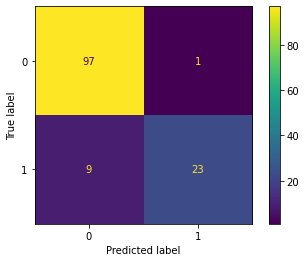

In [22]:
# Plot a confusion matrix on the test data
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [23]:
# call_on_students(1)

In [24]:
# Prediction
y_pred = logreg.predict(X_test_scaled)

In [25]:
# Accuracy
# By hand: TP + TN / TP + TN + FP + FN
accuracy = (23 + 97) / (23 + 97 + 1 + 9)
print(accuracy)

# Accuracy
accuracy_score(y_test, y_pred)

0.9230769230769231


0.9230769230769231

In [26]:
# Precision
# By hand: TP / TP + FP
precision = 23 / (23 + 1)
print(precision)

# Precision
precision_score(y_test, y_pred)

0.9583333333333334


0.9583333333333334

In [27]:
# Recall
# By hand: TP / TP + FN
recall = 23 / (23 + 9)
print(recall)

# Recall
recall_score(y_test, y_pred)

0.71875


0.71875

In [28]:
# F1-Score
# By hand
f1score = 2 * precision * recall / (precision + recall)
print(f1score)


# F1-Score
f1_score(y_test, y_pred)

0.8214285714285714


0.8214285714285714

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [30]:
# call_on_students(1)

In [31]:
# Calculate roc-auc
y_pred = logreg.predict_proba(X_test_scaled)[:, 1]

roc_auc_score(y_test, y_pred)

0.9811862244897959

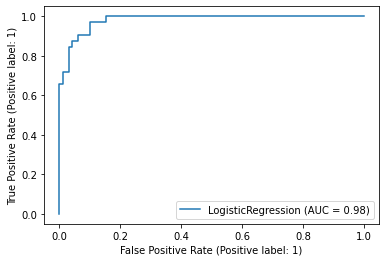

In [32]:
# Plot the ROC curve
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [33]:
# call_on_students(1)

#### Answer:

- Doing well! Very high metrics all around - more FN than FP (better precision than recall)


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [34]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

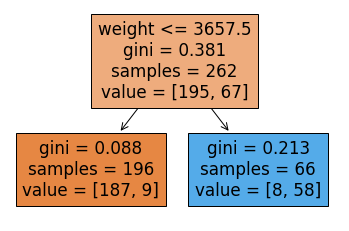

In [35]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

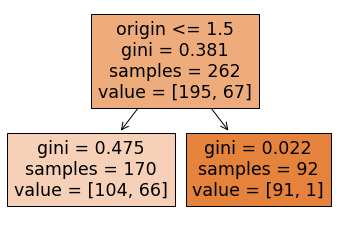

In [36]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [37]:
# call_on_students(1)

#### Answer:

- Version one is better because the purity at the leaf node is better. 187 in class 0, 9 in class 1.
- Gini score is better in version one - which references the impurity score directly.

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [38]:
# call_on_students(1)

In [39]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

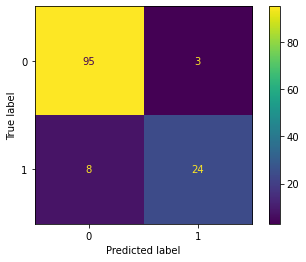

In [40]:
# Plot a confusion matrix on the test data
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt, X_test_scaled, y_test);

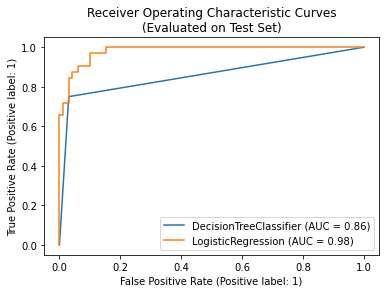

In [41]:
from sklearn.metrics import RocCurveDisplay

# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(dt, X_test_scaled, y_test, ax=ax)
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax)


plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)");

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [42]:
# call_on_students(1)

#### Answer:

- Logistic regression has the higher roc-auc score closer to 1, and has more area under the curve since it's closer to the top left corner of the graph


In [43]:
print(classification_report(y_test, dt.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.89      0.75      0.81        32

    accuracy                           0.92       130
   macro avg       0.91      0.86      0.88       130
weighted avg       0.91      0.92      0.91       130

